In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score 
from sklearn import preprocessing

train = pd.read_csv("/Users/rou/Desktop/5100AI/project/NLP/nlp-getting-started/train.csv")
test = pd.read_csv("/Users/rou/Desktop/5100AI/project/NLP/nlp-getting-started/test.csv")

In [8]:
display(train.head())
train.info()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
display(test.head())
test.info()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


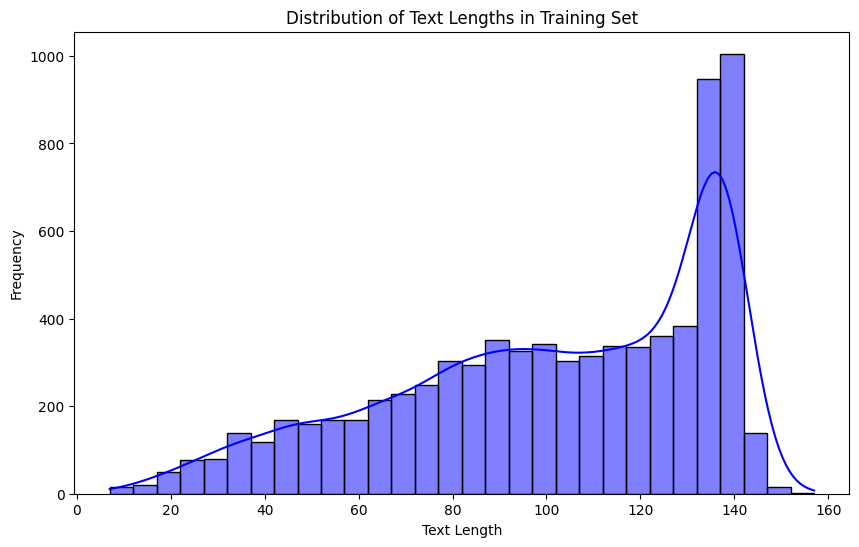

In [10]:
train['text_length'] = train['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths in Training Set')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

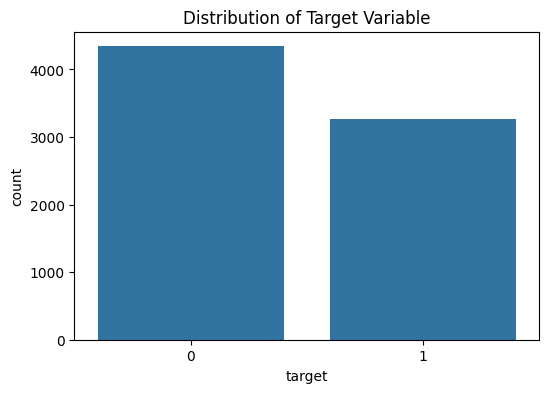

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train)
plt.title('Distribution of Target Variable')
plt.show()

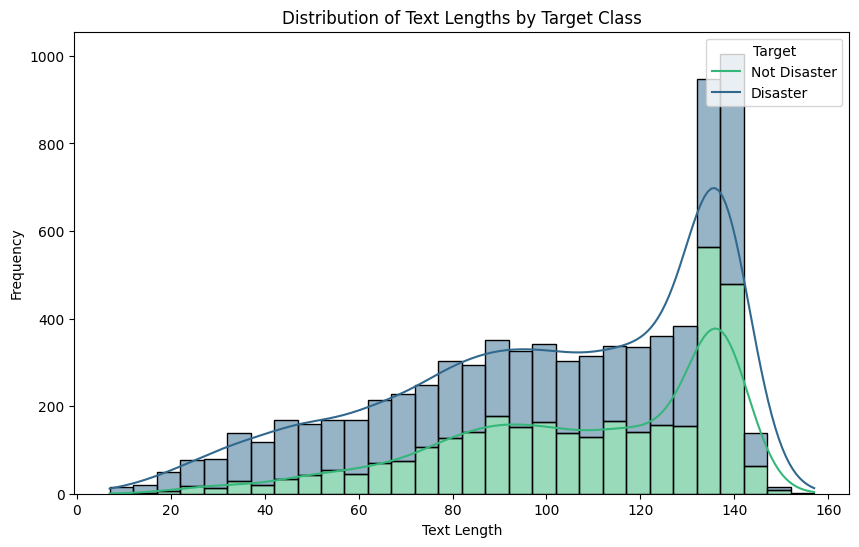

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x='text_length', hue='target', data=train, bins=30, kde=True, multiple='stack', palette='viridis')
plt.title('Distribution of Text Lengths by Target Class')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Target', loc='upper right', labels=['Not Disaster', 'Disaster'])
plt.show()

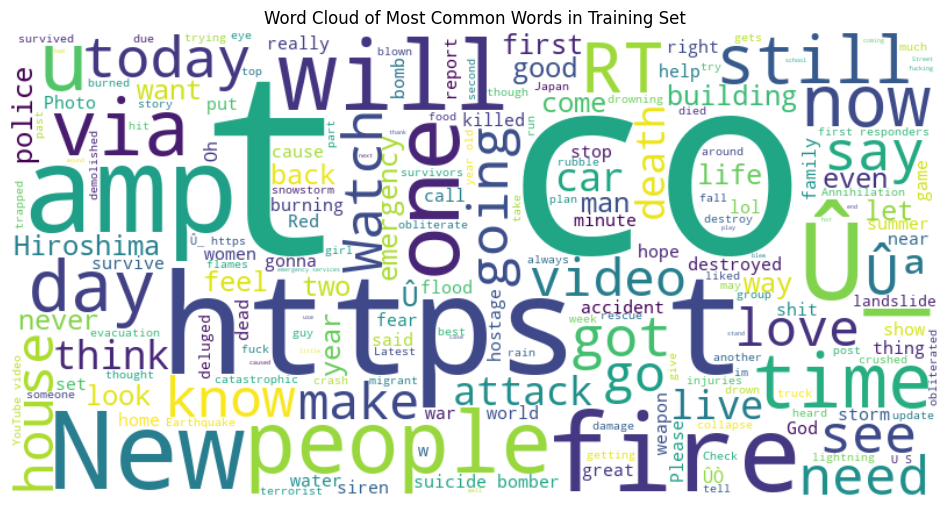

In [14]:
from wordcloud import WordCloud

text_combined = " ".join(test['text'])

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_combined)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Training Set')
plt.show()

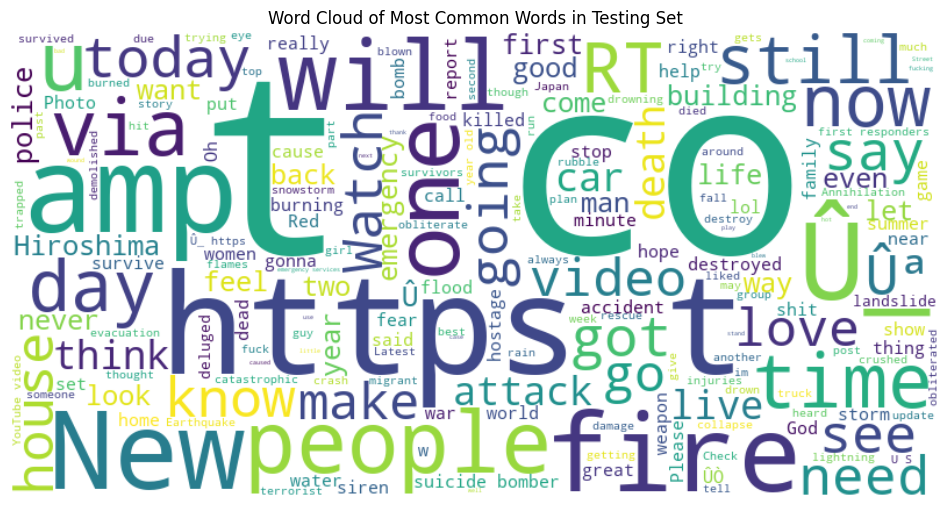

In [15]:
text_combined = " ".join(test['text'])

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_combined)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Testing Set')
plt.show()

In [3]:
lbl_enc = preprocessing.LabelEncoder()

y = lbl_enc.fit_transform(train.target.values) # We use the LabelEncoder from scikit-learn to convert text labels to integers, 0, 1

xtrain, xvalid, ytrain, yvalid = train_test_split(train.text.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

print (xtrain.shape)
print (xvalid.shape)

(6090,)
(1523,)


In [20]:
# tfv = TfidfVectorizer()
tfv = TfidfVectorizer(min_df=2,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 2), use_idf=True,smooth_idf=True,sublinear_tf=True,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(train['text'])
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)
xtest_tfv = tfv.transform(test['text']) 

In [21]:
# Train the model
model = LogisticRegression(C=1.0)
model.fit(xtrain_tfv, ytrain)

LogisticRegression()

In [22]:
val_predictions = model.predict(xvalid_tfv)
print("Validation Accuracy:", accuracy_score(yvalid, val_predictions))

Validation Accuracy: 0.814182534471438


In [23]:
f1_score(yvalid, val_predictions)

0.7615838247683235

In [24]:
# Evaluation of training data:

In [25]:
y_pred_train = model.predict(xtrain_tfv)

In [26]:
f1_score(y_pred_train, ytrain)

0.8479495268138801

In [27]:
accuracy_score(y_pred_train, ytrain)

0.8812807881773399

In [ ]:
#To predict target for test:

In [40]:
test_predictions = model.predict(xtest_tfv)

In [41]:
submission = pd.DataFrame({'id': test['id'], 'target': test_predictions})
submission.to_csv('logistic_tfidf.csv', index=False)